In [1]:
import pandas as pd
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pd.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out= pd.read_csv(loc,**kwargs)
    return out

import urllib
def getLargeFile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pd.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        url = gdrive
        urllib.request.urlretrieve(gdrive, loc)
        out= pd.read_csv(loc,**kwargs)
    return out

fname = ("Crime_Data_from_2020_to_Present.csv", 
         "https://drive.google.com/u/0/uc?id=1WwLkX_BADtPY83rFQ4CQ5Lbf6UcI055A&export=download&confirm=t&uuid=4e0aae58-2f5b-4420-941f-8f2f49ae0cb8&at=ALAFpqzX_FrSz-hUtqhaXe2ui7h6:1667673013562")
data = getLargeFile(fname)
data.head()

local file not found; accessing Google Drive


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [2]:
data.shape

(590832, 28)

In [3]:
data=data.drop(['DR_NO', 'Date Rptd', 'DATE OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
        'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT','LON','Vict Descent'],axis=1)
data

,TIME OCC,Vict Age,Vict Sex
0,2230,36,F
1,330,25,M
2,1200,0,X
3,1730,76,F
4,415,31,X
...,...,...,...
590827,1900,57,F
590828,10,34,F
590829,1530,0,NaN
590830,2000,0,NaN


In [4]:
data.isnull().sum(axis=0)

TIME OCC        0
Vict Age        0
Vict Sex    78158
dtype: int64

In [5]:
data.dropna(inplace=True,how='any') 


In [6]:
data['Vict Sex']

0         F
1         M
2         X
3         F
4         X
         ..
590825    M
590826    M
590827    F
590828    F
590831    F
Name: Vict Sex, Length: 512674, dtype: object

In [7]:
data['Vict Age']

0         36
1         25
2          0
3         76
4         31
          ..
590825    46
590826    33
590827    57
590828    34
590831    61
Name: Vict Age, Length: 512674, dtype: int64

#View basic statistical indicators of data

In [8]:
print (data.describe()) 

            TIME OCC       Vict Age
count  512674.000000  512674.000000
mean     1322.120892      34.542992
std       654.746483      19.591708
min         1.000000      -1.000000
25%       900.000000      24.000000
50%      1400.000000      34.000000
75%      1845.000000      48.000000
max      2359.000000      99.000000


In [9]:
data.drop(data[data['Vict Age'] < 1].index, axis=0, inplace=True)

##Check the frequency of Vict Age and Vict Sex


In [10]:
t = pd.crosstab(index=data['Vict Sex'], columns=data['Vict Age'],margins=True)
print(t)

Vict Age    2    3    4    5    6    7    8    9   10   11  ...   91   92  93  \
Vict Sex                                                    ...                 
F         116  146  182  192  176  201  205  248  268  427  ...   90   68  44   
H           0    0    0    0    0    1    0    0    0    0  ...    0    0   0   
M         147  145  145  170  169  159  163  190  198  275  ...   52   30  26   
X          10   10    4    3    1    7    3    6   19    7  ...    2    2   0   
All       273  301  331  365  346  368  371  444  485  709  ...  144  100  70   

Vict Age  94  95  96  97  98   99     All  
Vict Sex                                   
F         49  36  31  23  21  100  215220  
H          0   0   0   0   0    0      64  
M         23  24  22  15  22  105  227350  
X          1   0   0   0   2    3    4912  
All       73  60  53  38  45  208  447546  

[5 rows x 99 columns]


##Check the probability of each Vict Age and each Vict Sex

In [11]:
t = pd.crosstab(index=data['Vict Sex'], columns=data['Vict Age'],margins=True,normalize='index')
print(t)

Vict Age        2         3         4         5         6         7   \
Vict Sex                                                               
F         0.000539  0.000678  0.000846  0.000892  0.000818  0.000934   
H         0.000000  0.000000  0.000000  0.000000  0.000000  0.015625   
M         0.000647  0.000638  0.000638  0.000748  0.000743  0.000699   
X         0.002036  0.002036  0.000814  0.000611  0.000204  0.001425   
All       0.000610  0.000673  0.000740  0.000816  0.000773  0.000822   

Vict Age        8         9         10        11  ...        90        91  \
Vict Sex                                          ...                       
F         0.000953  0.001152  0.001245  0.001984  ...  0.000432  0.000418   
H         0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
M         0.000717  0.000836  0.000871  0.001210  ...  0.000334  0.000229   
X         0.000611  0.001221  0.003868  0.001425  ...  0.000000  0.000407   
All       0.000829  0.000992  0.0

##Check the probability of each Vict Age and Vict Sex

In [12]:
t = pd.crosstab(index=data['Vict Sex'], columns=data['Vict Age'],margins=True,normalize='columns')
print(t)

Vict Age         2         3         4         5         6         7  \
Vict Sex                                                               
F         0.424908  0.485050  0.549849  0.526027  0.508671  0.546196   
H         0.000000  0.000000  0.000000  0.000000  0.000000  0.002717   
M         0.538462  0.481728  0.438066  0.465753  0.488439  0.432065   
X         0.036630  0.033223  0.012085  0.008219  0.002890  0.019022   

Vict Age         8         9        10        11  ...        91    92  \
Vict Sex                                          ...                   
F         0.552561  0.558559  0.552577  0.602257  ...  0.625000  0.68   
H         0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.00   
M         0.439353  0.427928  0.408247  0.387870  ...  0.361111  0.30   
X         0.008086  0.013514  0.039175  0.009873  ...  0.013889  0.02   

Vict Age        93        94   95        96        97        98        99  \
Vict Sex                                           

M    0.507992
F    0.480889
X    0.010975
H    0.000143
Name: Vict Sex, dtype: float64

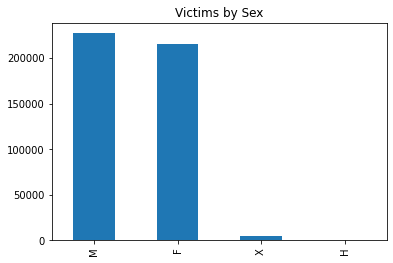

In [13]:
data['Vict Sex'].value_counts().plot(kind='bar', title='Victims by Sex');
data['Vict Sex'].value_counts() / data.shape[0]

In [ ]:
#def gender_to_numeric(x):
#        if x=='M': return 3
#        if x=='F': return 2
#        if x=='X': return 1
#        if x=='H': return 0
#
#data['Vict Sex'] = data['Vict Sex'].apply(gender_to_numeric)
#data['Vict Sex'].unique()

Here the sorted Vict sex type is 0-3, in order to be consistent with the histogram order generated by countplot() below, and then you can add numeric labels to the histogram in the same order

In [14]:
a = data['Vict Sex'].value_counts()
b = pd.DataFrame({'Sex_type':pd.Series(a.index),
                 'counts':pd.Series(a.values)})
b = b.sort_values(by='Sex_type',ascending=True)#这里排序后prestige_type为1~4，目的是为了和下面countplot()函数生成的柱状图顺序保持一致，然后就可以按相同顺序给柱状图添加数值标签
print(b)

  Sex_type  counts
1        F  215220
3        H      64
0        M  227350
2        X    4912


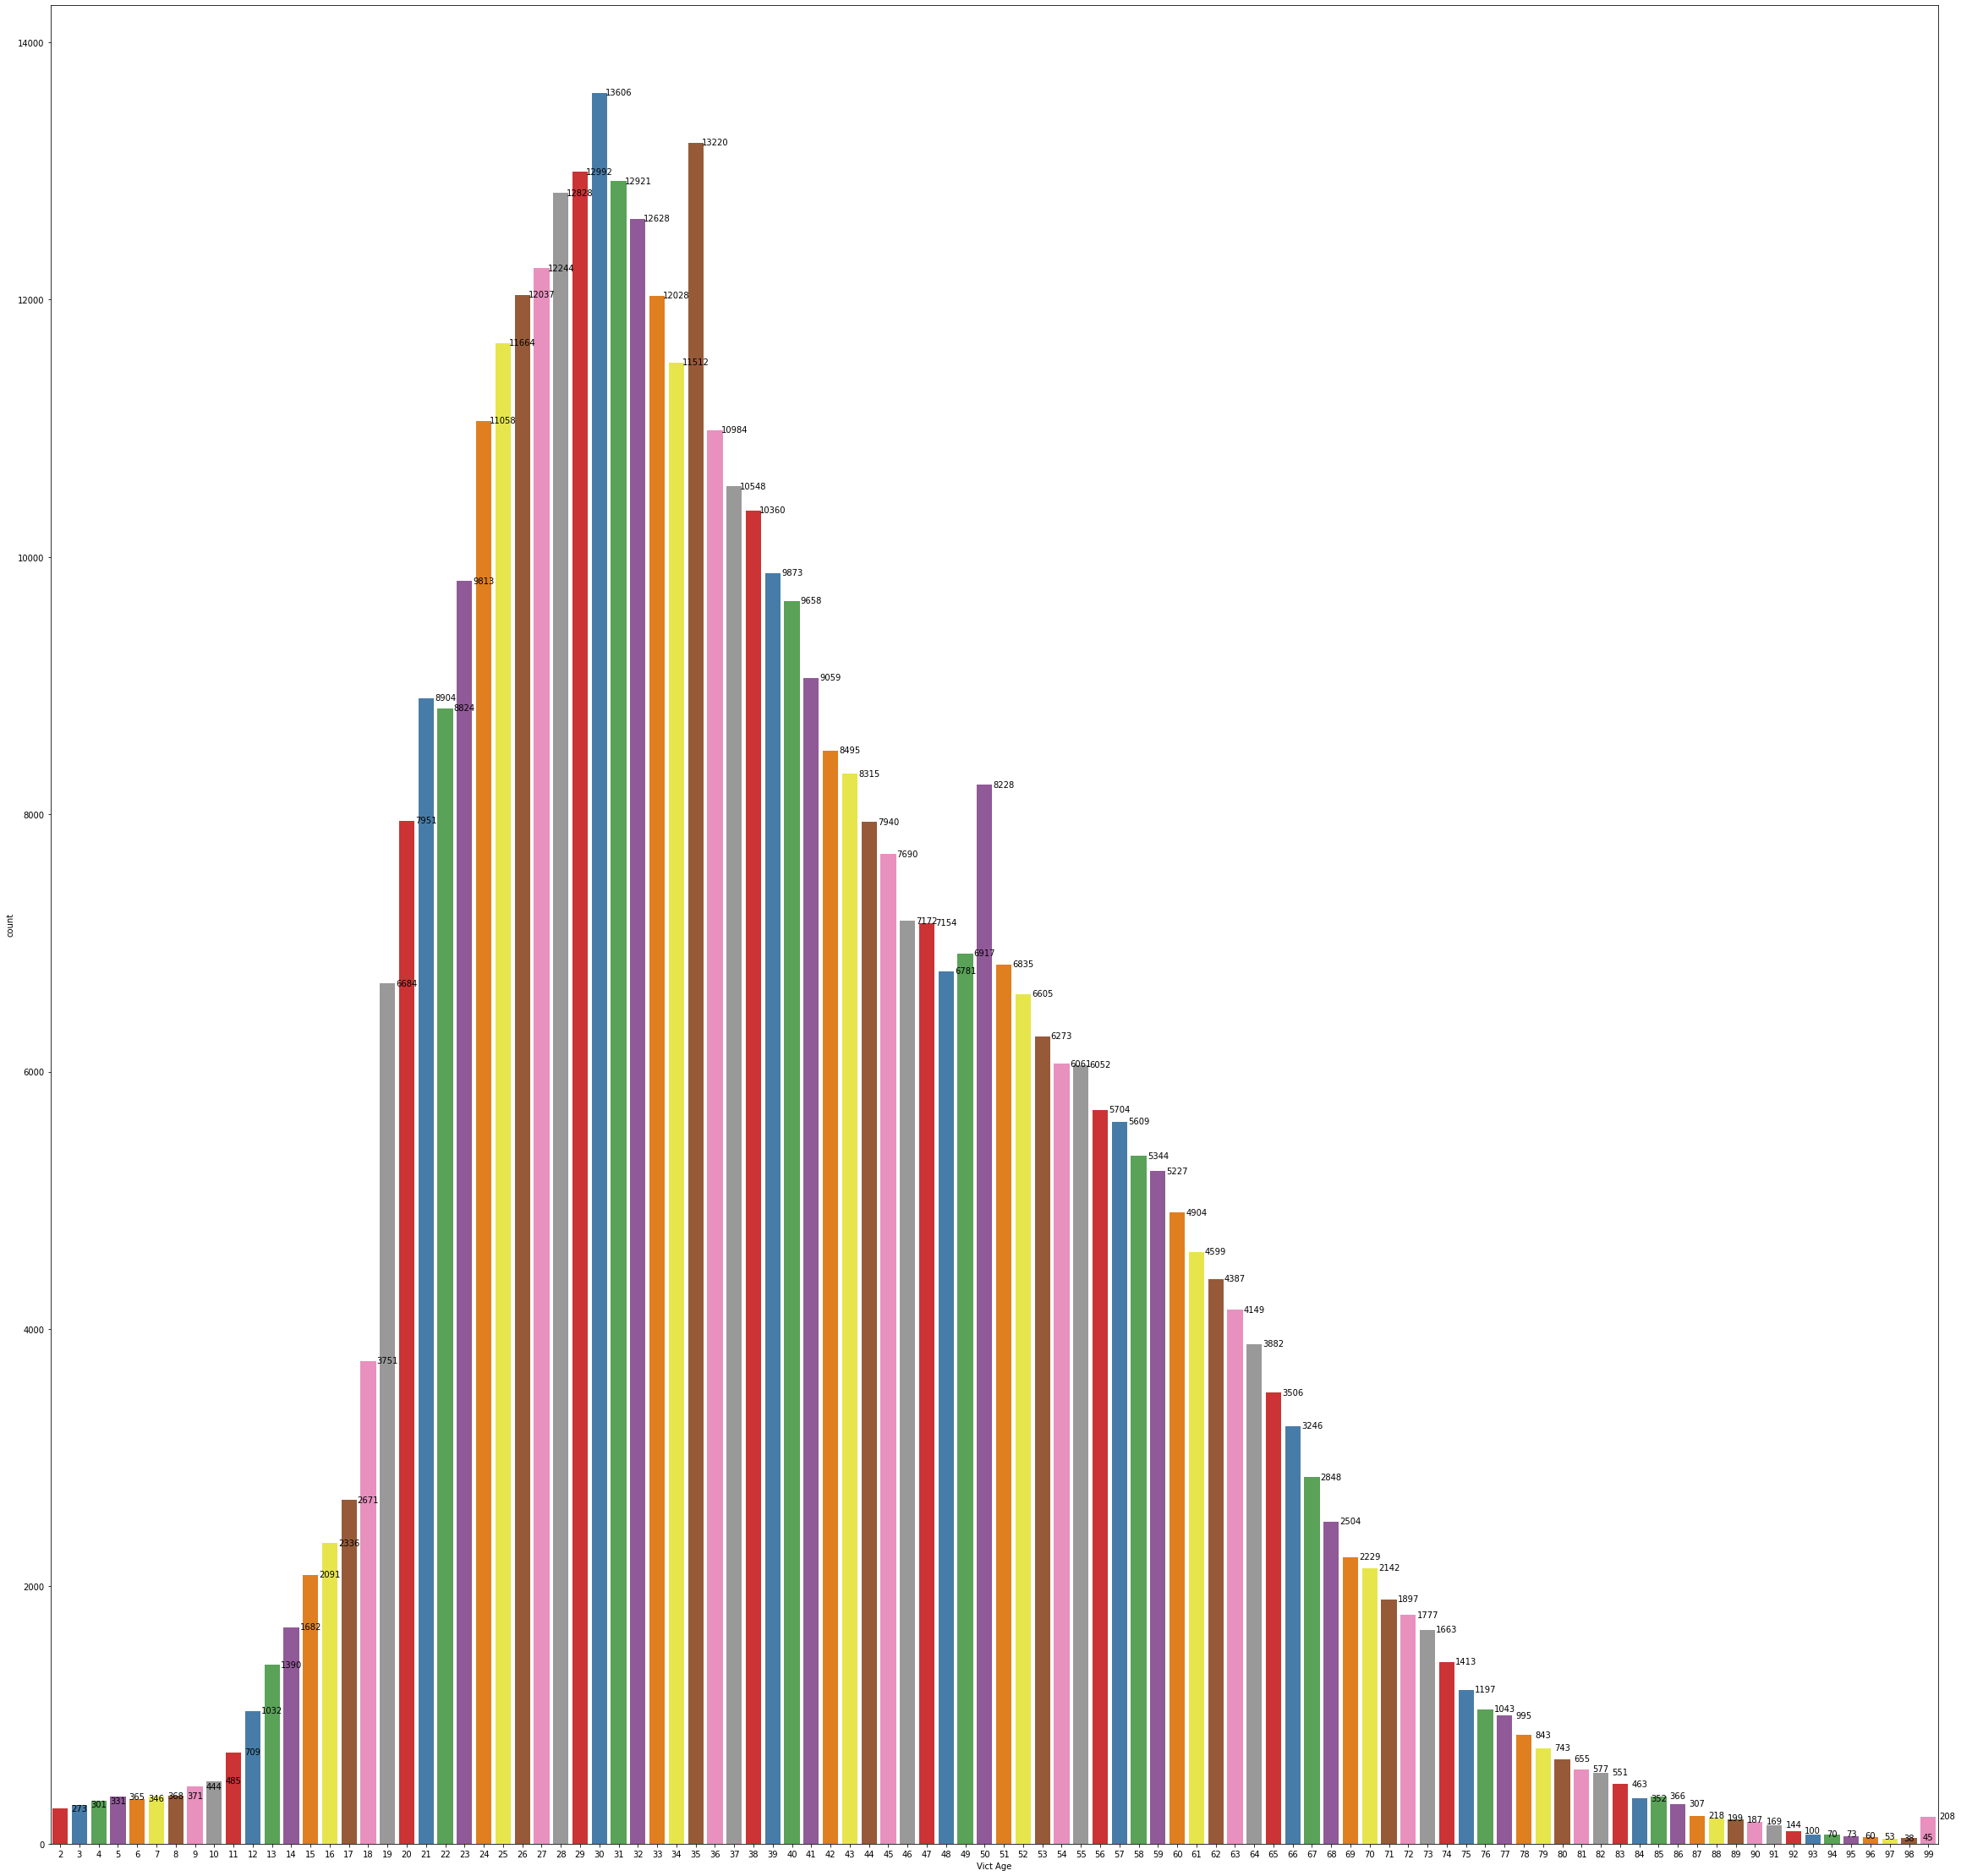

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [40, 40]

a = data['Vict Age'].value_counts()
b = pd.DataFrame({'Age_type':pd.Series(a.index),
                 'counts':pd.Series(a.values)})
b = b.sort_values(by='Age_type',ascending=True)
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(x='Vict Age',data=data,palette='Set1')
for x,y in zip(b.Age_type,b.counts):
    plt.text(x-1,y+3,str(y),horizontalalignment='center',verticalalignment='center')

##Plot the frequency distribution of the age of the victim

Text(0.5, 1.0, 'Boxplot of age')

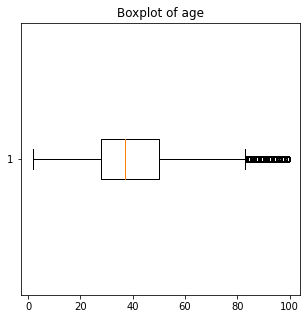

In [16]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.boxplot(x = data['Vict Age'],vert = False)
plt.title('Boxplot of age')

##Plot the frequency distribution of the Time Occ


Text(0.5, 1.0, 'Boxplot of time')

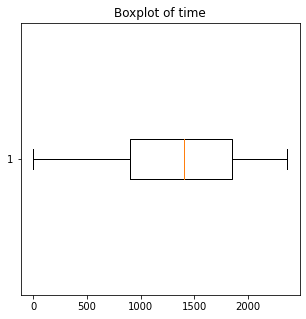

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(x = data['TIME OCC'],vert = False)
plt.title('Boxplot of time')

#Use logistic regression for modeling

In [18]:
from sklearn.model_selection import train_test_split

#data['gender'] = data.gender.map({'M':0,'F':1})

col = ['Vict Age','TIME OCC']
x = data[col]
y = data['Vict Sex']

##Training and Testing

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [20]:
import sklearn.linear_model as sk

logreg = sk.LogisticRegressionCV(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)
logreg.fit(x_train,y_train)

LogisticRegressionCV(class_weight='balanced', max_iter=1000,
                     multi_class='multinomial')

##Model of fit

In [21]:
#lr = LogisticRegression(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)
#For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss
#lr.fit(x_train,y_train) 
score = logreg.score(x_train,y_train)
print(score)



0.28023718285312094


##Coefficient of independent variable

In [22]:
print(logreg.coef_)


[[ 2.42254219e-02 -9.35846714e-05]
 [ 2.67750534e-02  1.00594210e-04]
 [ 3.41814426e-02 -1.03649734e-05]
 [-8.51819179e-02  3.35543356e-06]]


##View the intercept item

In [23]:
print(logreg.intercept_)


[-0.54484284 -0.91579757 -1.06339883  2.52403924]


##Rank of importance of variables

###To measure the importance of a variable, the absolute value of the coefficient of a variable is mainly considered. The larger the absolute value of the coefficient is, the greater the influence of the variable on y.

In [24]:
coef_c1 = pd.DataFrame({'var' : pd.Series(x_test.columns),
                        'coef_abs' : abs(pd.Series(logreg.coef_[0].flatten()))
                        })
coef_c1 = coef_c1.sort_values(by = 'coef_abs',ascending=False)
print(coef_c1)

        var  coef_abs
0  Vict Age  0.024225
1  TIME OCC  0.000094


It can be seen that for classification model 1, Vict Age has the greatest impact on y.

In [25]:
coef_c2 = pd.DataFrame({'var' : pd.Series(x_test.columns),
                        'coef_abs' : abs(pd.Series(logreg.coef_[1].flatten()))
                        })
coef_c2 = coef_c2.sort_values(by = 'coef_abs',ascending=False)
print(coef_c2)

        var  coef_abs
0  Vict Age  0.026775
1  TIME OCC  0.000101


Look at the importance of the respective variables in Model 2 Vict Age has the greatest impact on y too

In [26]:
coef_c3 = pd.DataFrame({'var' : pd.Series(x_test.columns),
                        'coef_abs' : abs(pd.Series(logreg.coef_[2].flatten()))
                        })
coef_c3 = coef_c3.sort_values(by = 'coef_abs',ascending=False)
print(coef_c3)

        var  coef_abs
0  Vict Age  0.034181
1  TIME OCC  0.000010


#Evaluation of model

##Score of model

In [27]:
from sklearn.metrics import accuracy_score

score = logreg.score(x_train,y_train)#Return the mean accuracy on the given test data and labels.
print(score)

#The score of the model on the training set
train_score = accuracy_score(y_train,logreg.predict(x_train))
print(train_score)

#The score of the model on the testing set
test_score = logreg.score(x_test,y_test)
print(test_score)

0.28023718285312094
0.28023718285312094
0.2814881018880572


##Rate of recall

In [28]:
from sklearn.metrics import recall_score

#Rate of recall of tranning
train_recall = recall_score(y_train, logreg.predict(x_train), average='macro')
print(train_recall)#0.47934382086167804
#Rate of recall of testing
test_recall = recall_score(y_test, logreg.predict(x_test), average='macro')
print(test_recall)#0.5002736726874658


0.41440500375415623
0.3904850068016241


#Forecasting


##The prediction sample belongs to each category of probability


In [29]:
y_pro = logreg.predict_proba(x_test) 
print(y_pro)

[[0.30748202 0.27987034 0.28613391 0.12651373]
 [0.23213569 0.22904674 0.20284703 0.33597054]
 [0.23414328 0.27457878 0.22625624 0.2650217 ]
 ...
 [0.28298677 0.20977369 0.22267114 0.2845684 ]
 [0.27016745 0.31327065 0.27643786 0.14012404]
 [0.28298677 0.20977369 0.22267114 0.2845684 ]]


## Which specific category the prediction sample belongs to

In [30]:
y_predict = logreg.predict(x_test)
print(y_predict)

['F' 'X' 'H' ... 'X' 'H' 'X']


##Matrix of confusion

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import pandas as pd
labelEncoder = LabelEncoder()
labelEncoder.fit(y)##Hardcode the variable y to turn the label into a number
cm = confusion_matrix(y_test, y_predict)
cm_pd = pd.DataFrame(data = cm,columns=labelEncoder.classes_, index=labelEncoder.classes_)
print(cm_pd)

      F     H      M      X
F  8943  8271  12308  13366
H     4     2      2      4
M  9412  9509  15420  11290
X    50    58     40    831


##Draw the confusion matrix graph

Text(0.5, 0, 'Forecast type')

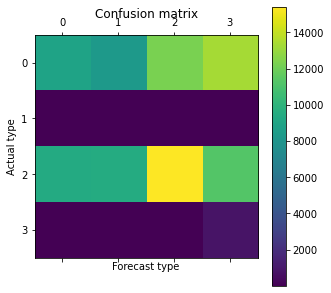

In [32]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(y_test, y_predict))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual type') 
plt.xlabel('Forecast type')

In [33]:
from sklearn.metrics import classification_report
print('Test data Index:\n',classification_report(y_test,y_predict,digits=4))

Test data Index:
               precision    recall  f1-score   support

           F     0.4858    0.2085    0.2918     42888
           H     0.0001    0.1667    0.0002        12
           M     0.5553    0.3379    0.4202     45631
           X     0.0326    0.8488    0.0628       979

    accuracy                         0.2815     89510
   macro avg     0.2684    0.3905    0.1937     89510
weighted avg     0.5162    0.2815    0.3547     89510

